In [1]:
import networkx as nx


In [2]:
g = nx.Graph([[0,1],[1,2],[0,3],[3,4],[2,5],[3,6]])

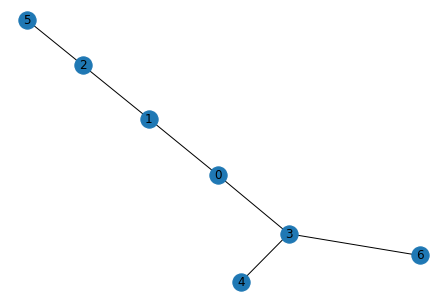

In [4]:
nx.draw(g, with_labels=True)